# HADES

Notebook to test out ideas and viz the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig

import hades
from hades import utils
from hades import pipeline

In [2]:
sample_rate = 1000 # Hz

def get_time_slice(start, duartion, sample_rate):
    time_slice = np.arange(0, int(duartion * sample_rate)) + int(start * sample_rate)
    return time_slice

In [3]:
# silly_pipeline = pipeline.SillyPipeline(fs=sample_rate)
# hades.pipeline.run_pipeline(silly_pipeline, "./data", "./preds");

In [4]:
# naive_linear_pipeline = pipeline.naive_pipelines.Linear(fs=sample_rate)
# hades.pipeline.run_pipeline(naive_linear_pipeline, "./data", "./preds", filter_data=(0.1, 100));

In [5]:
# naive_svm_pipeline = pipeline.naive_pipelines.SVM("./data", fs=sample_rate)
# hades.pipeline.run_pipeline(naive_svm_pipeline, "./preds");

In [6]:
# def dist(x1, x2):
#     return np.linalg.norm(x1 - x2)

# naive_lookup_pipeline = pipeline.naive_pipelines.Lookup(fs=sample_rate, distance_fn=dist, downsample_factor=25)
# hades.pipeline.run_pipeline(naive_lookup_pipeline, "./data", "./preds");

In [7]:
# downsampled_linear_pipeline = pipeline.naive_pipelines.DownsampledLinear(fs=sample_rate)
# hades.pipeline.run_pipeline(downsampled_linear_pipeline, "./data", "./preds");

In [8]:
part1_pipeline = pipeline.windowed_feature_pipelines.Part1(fs=sample_rate, window_length=100e-3, window_displacement=50e-3, history=3)
hades.pipeline.run_pipeline(part1_pipeline, "./data", "./preds");

 Subjects : 100%|██████████| 3/3 [00:07<00:00,  2.45s/it]


In [9]:
hades.pipeline.run_pipeline(part1_pipeline, "./data", "./preds", filter_data=(0.1, 100));

 Subjects : 100%|██████████| 3/3 [00:09<00:00,  3.09s/it]


In [6]:
train_data, train_label, test_data = utils.load_data("./data", 0)

In [7]:
time = np.linspace(0, len(train_data) / sample_rate, len(train_data))

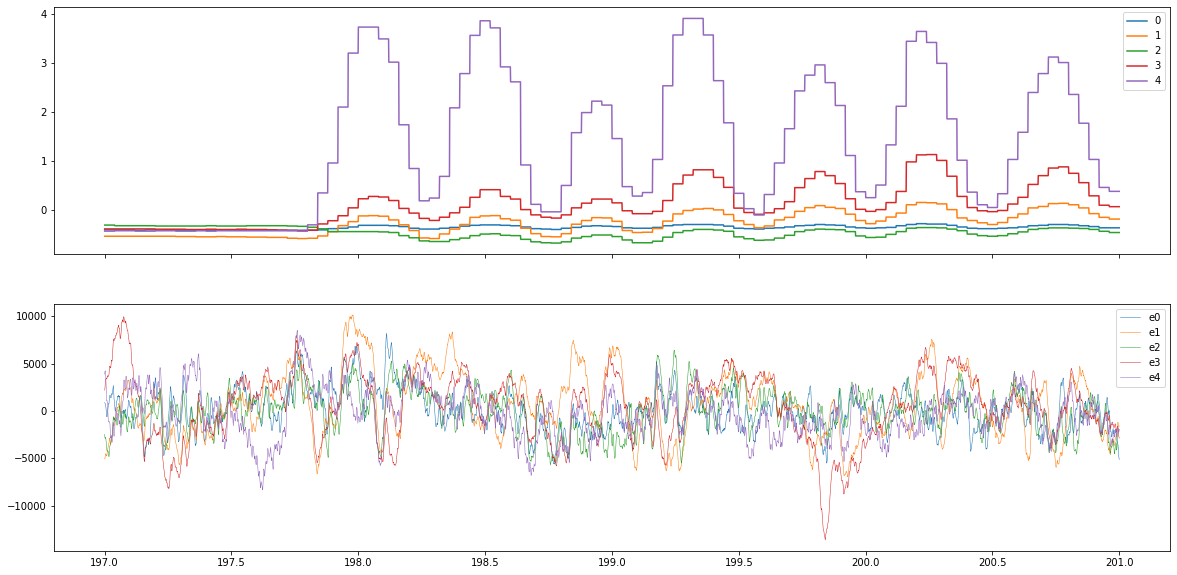

In [8]:
time_slice = get_time_slice(1+(4*49), 4, sample_rate=sample_rate)

fig = plt.figure(figsize=(20, 10))
axs0, axs1 = fig.subplots(nrows=2, sharex=True)

axs0.plot(time[time_slice], train_label[time_slice], label=["0", "1", "2", "3", "4"])
axs1.plot(time[time_slice], train_data[time_slice, 0:5], label=["e0", "e1", "e2", "e3", "e4"], linewidth=0.5)

axs0.legend()
axs1.legend()
plt.show()

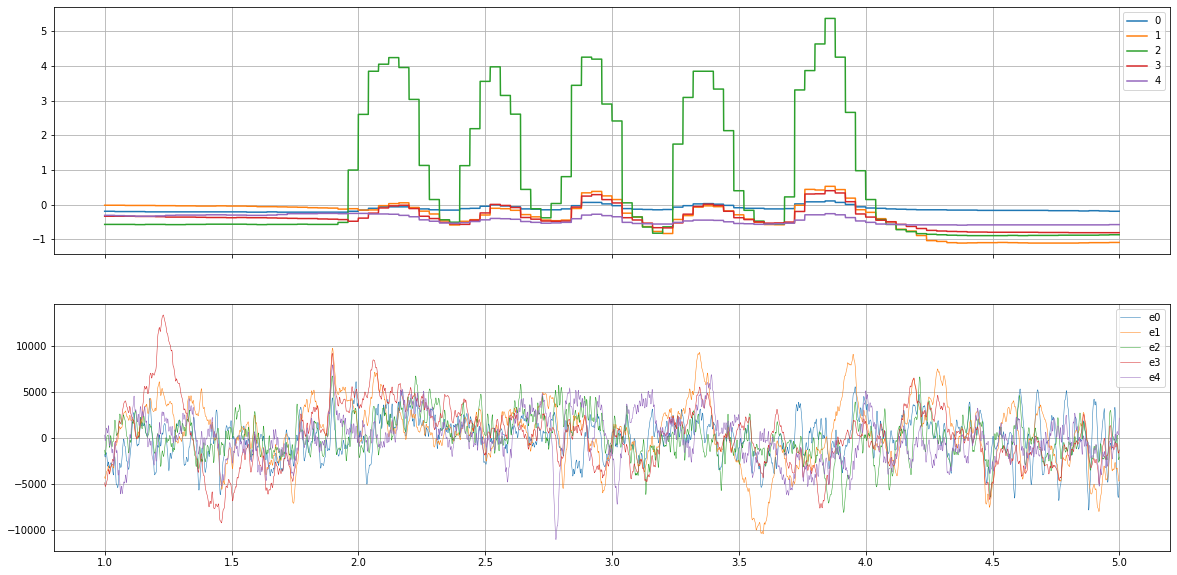

In [10]:
time_slice = get_time_slice((1+(4*0)), 4, sample_rate=sample_rate)

fig = plt.figure(figsize=(20, 10))
axs0, axs1 = fig.subplots(nrows=2, sharex=True)

axs0.plot(time[time_slice], train_label[time_slice], label=["0", "1", "2", "3", "4"])
axs1.plot(time[time_slice], hades.preprocessors.filter_data(train_data)[time_slice, 0:5], label=["e0", "e1", "e2", "e3", "e4"], linewidth=0.5)

axs0.grid(True)
axs1.grid(True)
axs0.legend()
axs1.legend()
plt.show()

In [11]:
linear_pipeline = pipeline.naive_pipelines.Linear(fs=sample_rate)#, downsample_factor=20)
train_data_filt = hades.preprocessors.filter_data(train_data, (0.1, 100))
label_clips = hades.preprocessors.get_label_clips(train_label)
linear_pipeline.fit(train_data_filt, train_label)
preds_label = linear_pipeline.predict(train_data)
preds_label = hades.postprocessors.clip_predictions(preds_label, label_clips)

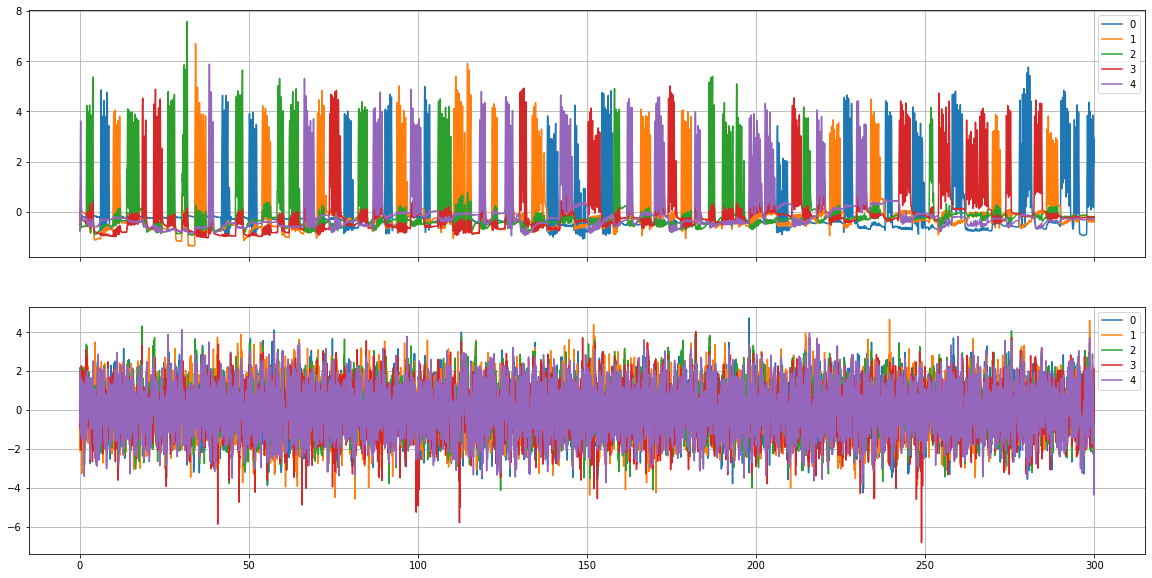

In [12]:
time_slice = get_time_slice((1+(4*0)), 4, sample_rate=sample_rate)

fig = plt.figure(figsize=(20, 10))
axs0, axs1 = fig.subplots(nrows=2, sharex=True)

axs0.plot(time, train_label, label=["0", "1", "2", "3", "4"])
axs1.plot(time, hades.preprocessors.normalize(train_data_filt)[0][:,[11, 16, 22, 49, 57]], label=["0", "1", "2", "3", "4"])

axs0.grid(True)
axs1.grid(True)
axs0.legend()
axs1.legend()
plt.show()

In [13]:
train_label0, train_label1, train_label2, train_label3, train_label4 = train_label.T

In [14]:
(train_label0[train_label0 < 0]).mean()

-0.3738056286131928

In [15]:
model = linear_pipeline.model.steps[1][1]
coefs = model.coef_
for fid, cfs in enumerate(coefs):
  cf = [(abs(cfs[i]), i) for i in range(len(cfs))]
  cf.sort(reverse=True, key=lambda x: x[0])
  print(f"For finger {fid}:")
  print([f"{i}: {v:.4f}, " for v, i in cf])
  print("\n\n")

For finger 0:
['49: 0.1036, ', '22: 0.0924, ', '52: 0.0779, ', '42: 0.0767, ', '56: 0.0691, ', '41: 0.0644, ', '0: 0.0627, ', '7: 0.0616, ', '28: 0.0610, ', '23: 0.0600, ', '27: 0.0496, ', '20: 0.0489, ', '19: 0.0443, ', '34: 0.0441, ', '25: 0.0433, ', '30: 0.0415, ', '24: 0.0360, ', '33: 0.0355, ', '31: 0.0347, ', '37: 0.0322, ', '45: 0.0319, ', '26: 0.0313, ', '16: 0.0310, ', '59: 0.0295, ', '11: 0.0284, ', '15: 0.0280, ', '13: 0.0274, ', '14: 0.0271, ', '61: 0.0266, ', '43: 0.0257, ', '55: 0.0245, ', '60: 0.0231, ', '2: 0.0228, ', '36: 0.0224, ', '5: 0.0216, ', '17: 0.0212, ', '1: 0.0201, ', '38: 0.0190, ', '44: 0.0174, ', '48: 0.0163, ', '50: 0.0156, ', '6: 0.0147, ', '51: 0.0131, ', '21: 0.0120, ', '9: 0.0117, ', '39: 0.0098, ', '18: 0.0094, ', '54: 0.0092, ', '29: 0.0082, ', '46: 0.0080, ', '58: 0.0080, ', '35: 0.0076, ', '12: 0.0074, ', '47: 0.0073, ', '3: 0.0050, ', '10: 0.0046, ', '32: 0.0036, ', '40: 0.0033, ', '4: 0.0030, ', '8: 0.0005, ', '57: 0.0000, ', '53: 0.0000, ']





In [8]:
x = np.arange(30).reshape((15, 2))
y = np.arange(10).reshape((5, 2))
x

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23],
       [24, 25],
       [26, 27],
       [28, 29]])

In [9]:
# x.reshape((-1, 3, 2))
# r = 3
# np.tile(y, (1, r)).reshape((r*y.shape[0], y.shape[1]))
x.reshape((x.shape[0]//3 ,-1))

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])